# Load Conf and Credentials

## Load Directory Locations

In [1]:
import json
import os

# Check if the file exists and load the JSON file into a dictionary
file_path = r'C:\Users\mike\Develop\Projects\Code Notebook\Credentials\locations_conf.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        locations_data = json.load(f)
    print(locations_data)
else:
    print(f"File not found: {file_path}")

{'Common_Funcs_Dir': '/Users/mike/Develop/Projects/Code Notebook/Common/Functions', 'Credentials_Dir': '/Users/mike/Develop/Projects/Code Notebook/Credentials', 'Rel_Pickes_Dir': '../.pickles', 'Pub_Data_Dir': "'/Users/mike/Data/Public", 'BQ_Service_Key': '/Users/mike/Develop/Conf/GCP Service Keys/mikecancell-development-0bcca41f8486.json'}


# Load the Pickled Dataframes into memory

In [2]:
import os
import pickle
import pandas as pd
import zipfile

directory = locations_data['Rel_Pickes_Dir']

for filename in os.listdir(directory):
    if filename.endswith('.pkl') or filename.endswith('.pkl.zip'):
        filepath = os.path.join(directory, filename)
        try:
            if filename.endswith('.pkl.zip'):
                with zipfile.ZipFile(filepath, 'r') as zip_ref:
                    for zip_info in zip_ref.infolist():
                        if zip_info.filename.endswith('.pkl'):
                            with zip_ref.open(zip_info) as file:
                                df_name = os.path.splitext(os.path.splitext(filename)[0])[0]
                                globals()[df_name] = pd.DataFrame(pickle.load(file))
                                print(f"Loaded DataFrame from zip: {df_name}")
                                print(globals()[df_name].info())
            else:
                with open(filepath, 'rb') as file:
                    df_name = os.path.splitext(filename)[0]
                    globals()[df_name] = pd.DataFrame(pickle.load(file))
                    print(f"Loaded DataFrame: {df_name}")
                    print(globals()[df_name].info())
        except Exception as e:
            print(f"Error loading {filename}: {e}")

# Now each pickle file is loaded into its own respective DataFrame variable

Loaded DataFrame from zip: crime_facts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585000 entries, 0 to 584999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dr_no           585000 non-null  object        
 1   date_rptd       585000 non-null  datetime64[ns]
 2   datetime_occ    585000 non-null  datetime64[ns]
 3   rpt_dist_no     585000 non-null  int16         
 4   vict_age        585000 non-null  int16         
 5   lat             585000 non-null  float64       
 6   lon             585000 non-null  float64       
 7   area            585000 non-null  int16         
 8   premis_cd       585000 non-null  int16         
 9   crm_cd          585000 non-null  int16         
 10  vict_sex        585000 non-null  category      
 11  vict_descent    585000 non-null  category      
 12  weapon_used_cd  585000 non-null  int16         
 13  status          585000 non-null  category      
dt

# Analysis Ideas for Crime Data

## 1. Temporal Analysis
- **Trend Analysis**: Analyze the trend of crimes over the years, months, and weeks.
- **Seasonal Patterns**: Identify any seasonal patterns in crime occurrences.
- **Time of Day Analysis**: Determine the most common times of day for crimes to occur.

## 2. Spatial Analysis
- **Crime Hotspots**: Identify geographical areas with high crime rates.
- **Crime Distribution**: Visualize the distribution of different types of crimes across various areas.
- **Location-Based Analysis**: Analyze crimes based on specific locations such as streets, neighborhoods, and premises.

## 3. Demographic Analysis
- **Victim Demographics**: Analyze the demographics of crime victims, including age, gender, and descent.
- **Perpetrator Demographics**: If data is available, analyze the demographics of perpetrators.

## 4. Crime Type Analysis
- **Crime Categories**: Analyze the frequency and distribution of different types of crimes.
- **Weapon Usage**: Examine the types of weapons used in crimes and their frequency.
- **Premises Analysis**: Analyze the types of premises where crimes occur most frequently.

## 5. Status Analysis
- **Crime Resolution**: Analyze the status of crimes (e.g., Adult Other, Invest Cont, Adult Arrest) to understand resolution rates.
- **Unresolved Crimes**: Identify and analyze unresolved crimes to find patterns or common factors.

## 6. Comparative Analysis
- **Yearly Comparison**: Compare crime statistics year over year to identify trends and changes.
- **Area Comparison**: Compare crime rates and types across different areas to identify high-risk zones.

## 7. Predictive Analysis
- **Crime Prediction**: Use historical data to predict future crime occurrences and hotspots.
- **Risk Assessment**: Develop risk assessment models to identify potential high-risk areas and times.

## 8. Correlation Analysis
- **Crime Correlations**: Identify correlations between different variables such as time, location, victim demographics, and crime types.
- **External Factors**: Analyze the impact of external factors (e.g., economic conditions, public events) on crime rates.

## 9. Visualization
- **Heatmaps**: Create heatmaps to visualize crime hotspots and distribution.
- **Time Series Plots**: Use time series plots to show trends and patterns over time.
- **Bar Charts and Pie Charts**: Visualize the distribution of crime types, victim demographics, and other categorical data.

## 10. Reporting and Dashboards
- **Interactive Dashboards**: Develop interactive dashboards for real-time crime data analysis and visualization.
- **Automated Reports**: Generate automated reports summarizing key findings and trends in the data.

# 1. Temporal Analysis
- **Trend Analysis**: Analyze the trend of crimes over the years, months, and weeks.
- **Seasonal Patterns**: Identify any seasonal patterns in crime occurrences.
- **Time of Day Analysis**: Determine the most common times of day for crimes to occur.

## Violent Crimes

In [3]:
# Create a dictionary to store crime codes, descriptions, and inclusion flag
crime_code_dict = {}

# Predefined list of crime codes to include in the analysis
violent_crime_codes = [627, 236, 230, 821, 110, 815, 810, 122, 910, 121, 822, 113, 231, 920]

# Iterate through the crime descriptions and set inclusion flag based on predefined list
for index, row in dim_crime.iterrows():
    crime_code_dict[row['fk_crm_cd']] = {
        'description': row['crm_cd_desc'],
        'include_in_analysis': row['fk_crm_cd'] in violent_crime_codes
    }

#### Show list list as a table

In [4]:
from tabulate import tabulate

# Get the descriptions of violent crimes considered in the analysis
violent_crime_descriptions = [crime_code_dict[code]['description'] for code in violent_crime_codes]

# Number each description
numbered_violent_crime_descriptions = [f"{i+1}) {desc}" for i, desc in enumerate(violent_crime_descriptions)]

# Prepare data for tabulate
table_data = [numbered_violent_crime_descriptions[i:i+3] for i in range(0, len(numbered_violent_crime_descriptions), 3)]

# Display the table with left alignment and no headers
print(tabulate(table_data, tablefmt="pretty", stralign="left"))


+-------------------------------------------------------------+---------------------------------------------+---------------------------------------------------+
| 1) CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                  | 2) INTIMATE PARTNER - AGGRAVATED ASSAULT    | 3) ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT |
| 4) SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH  | 5) CRIMINAL HOMICIDE                        | 6) SEXUAL PENETRATION W/FOREIGN OBJECT            |
| 7) SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ | 8) RAPE, ATTEMPTED                          | 9) KIDNAPPING                                     |
| 10) RAPE, FORCIBLE                                          | 11) HUMAN TRAFFICKING - COMMERCIAL SEX ACTS | 12) MANSLAUGHTER, NEGLIGENT                       |
| 13) ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER            | 14) KIDNAPPING - GRAND ATTEMPT              |                                                   |
+---------------------------

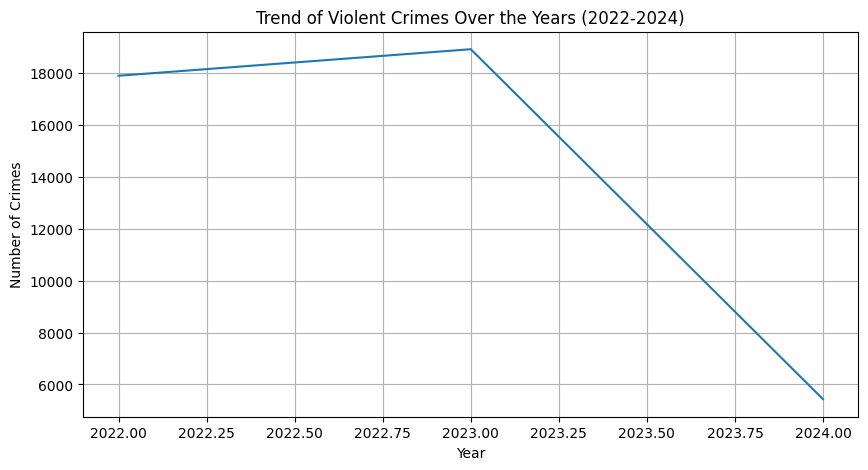

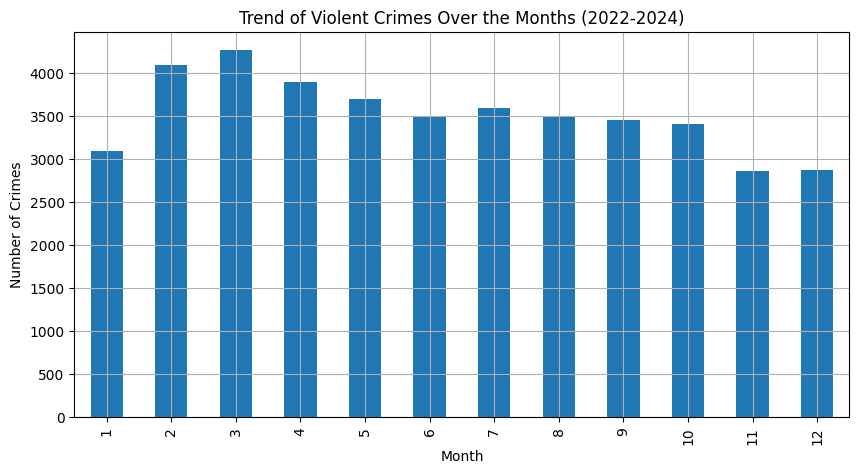

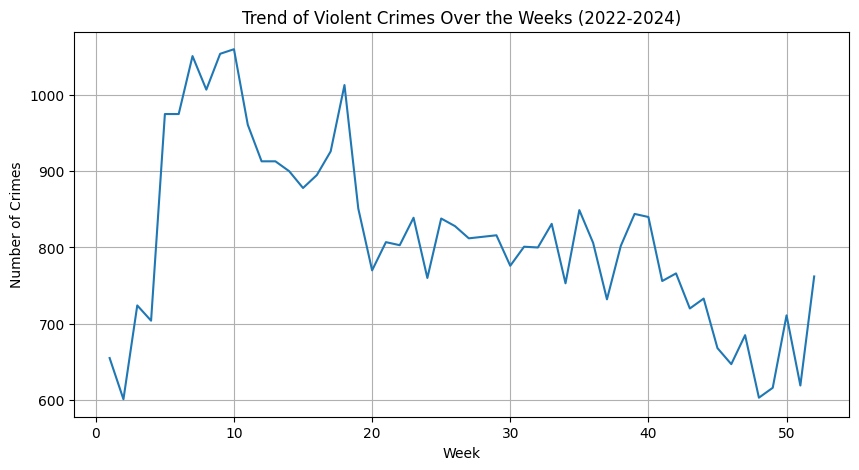

In [ ]:
import matplotlib.pyplot as plt

# Ensure violent_crime_codes is defined
violent_crime_codes = [627, 236, 230, 821, 110, 815, 810, 122, 910, 121, 822, 113, 231, 920]

# Filter the dataframe to only include violent crimes
violent_crime_facts = crime_facts[crime_facts['crm_cd'].isin(violent_crime_codes)].copy()

# Convert 'datetime_occ' to datetime if not already in datetime format
violent_crime_facts.loc[:, 'datetime_occ'] = pd.to_datetime(violent_crime_facts['datetime_occ'])

# Filter the dataframe to only include crimes that occurred between 2022 and 2024
violent_crime_facts = violent_crime_facts[(violent_crime_facts['datetime_occ'].dt.year >= 2022) & (violent_crime_facts['datetime_occ'].dt.year <= 2024)]

# Extract year, month, and week from 'datetime_occ'
violent_crime_facts.loc[:, 'year'] = violent_crime_facts['datetime_occ'].dt.year
violent_crime_facts.loc[:, 'month'] = violent_crime_facts['datetime_occ'].dt.month
violent_crime_facts.loc[:, 'week'] = violent_crime_facts['datetime_occ'].dt.isocalendar().week

# Trend Analysis: Crimes over the years
yearly_trend = violent_crime_facts['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
yearly_trend.plot(kind='line')
plt.title('Trend of Violent Crimes Over the Years (2022-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# Trend Analysis: Crimes over the months
monthly_trend = violent_crime_facts['month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='bar')
plt.title('Trend of Violent Crimes Over the Months (2022-2024)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# Trend Analysis: Crimes over the weeks
weekly_trend = violent_crime_facts['week'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind='line')
plt.title('Trend of Violent Crimes Over the Weeks (2022-2024)')
plt.xlabel('Week')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# 2. Spatial Analysis
- **Crime Hotspots**: Identify geographical areas with high crime rates.
- **Crime Distribution**: Visualize the distribution of different types of crimes across various areas.
- **Location-Based Analysis**: Analyze crimes based on specific locations such as streets, neighborhoods, and premises.

<Figure size 1000x1000 with 0 Axes>

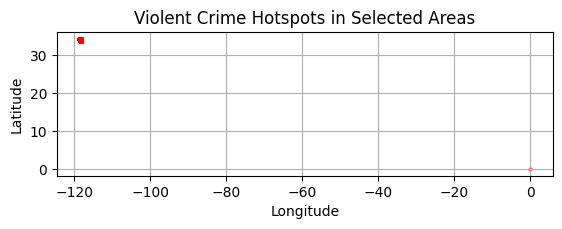

<Figure size 1500x1000 with 0 Axes>

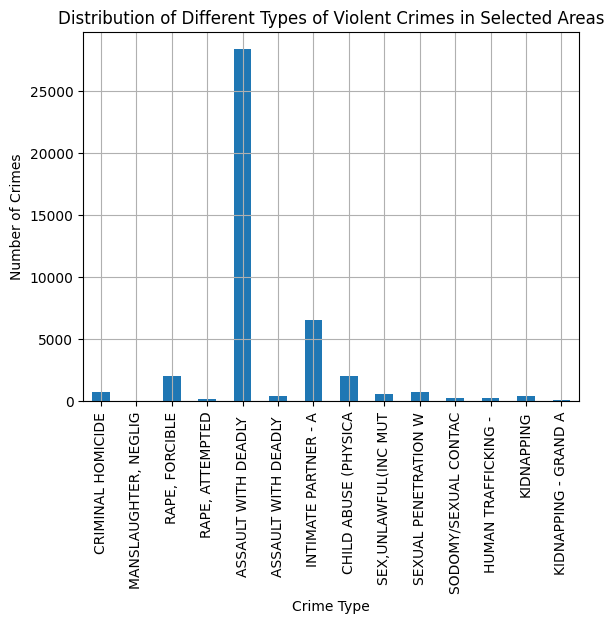

<Figure size 1500x1000 with 0 Axes>

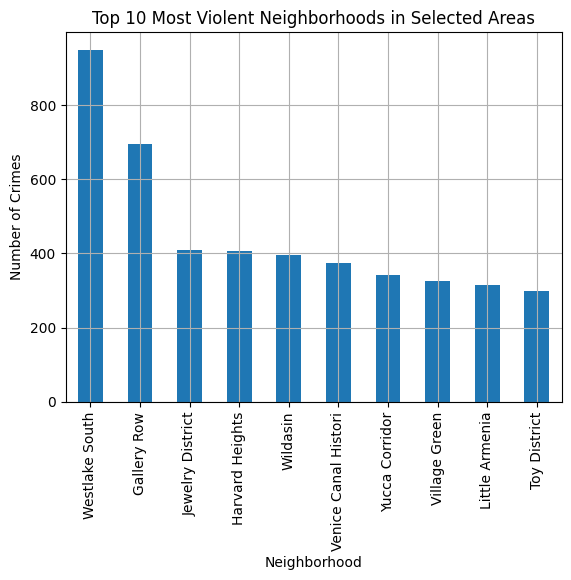

In [20]:
import geopandas as gpd
from shapely.geometry import Point

# Filter the dataframe to only include violent crimes
violent_crime_facts = crime_facts[crime_facts['crm_cd'].isin(violent_crime_codes)].copy()

# Narrow the range of lat and lon by looking at the range in the fact table
min_lat, max_lat = violent_crime_facts['lat'].min(), violent_crime_facts['lat'].max()
min_lon, max_lon = violent_crime_facts['lon'].min(), violent_crime_facts['lon'].max()

# Filter the violent_crime_facts DataFrame to only include rows within the narrowed range
violent_crime_facts = violent_crime_facts[
    (violent_crime_facts['lat'] >= min_lat) & (violent_crime_facts['lat'] <= max_lat) &
    (violent_crime_facts['lon'] >= min_lon) & (violent_crime_facts['lon'] <= max_lon)
]

# Create a GeoDataFrame from the violent_crime_facts DataFrame
geometry = [Point(xy) for xy in zip(violent_crime_facts['lon'], violent_crime_facts['lat'])]
violent_crime_gdf = gpd.GeoDataFrame(violent_crime_facts, geometry=geometry)

# Filter the GeoDataFrame to include only the areas of interest
filtered_violent_crime_gdf = violent_crime_gdf[violent_crime_gdf['area'].isin(areas_of_interest)]

# Plot the crime hotspots for the filtered areas
plt.figure(figsize=(10, 10))
filtered_violent_crime_gdf.plot(marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Violent Crime Hotspots in Selected Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Visualize the distribution of different types of crimes across various areas
violent_crime_type_gdf = filtered_violent_crime_gdf.groupby('crm_cd').size().reset_index(name='count')
violent_crime_type_gdf = violent_crime_type_gdf.merge(dim_crime, left_on='crm_cd', right_on='fk_crm_cd')

plt.figure(figsize=(15, 10))
ax = violent_crime_type_gdf.plot(kind='bar', x='crm_cd_desc', y='count', legend=False)
ax.set_title('Distribution of Different Types of Violent Crimes in Selected Areas')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Number of Crimes')
ax.set_xticklabels([label[:20] for label in violent_crime_type_gdf['crm_cd_desc']], rotation=90)
ax.grid(True)
plt.show()

# Analyze crimes based on specific locations such as streets, neighborhoods, and premises
violent_location_gdf = filtered_violent_crime_gdf.merge(dim_location, on=['lat', 'lon'], how='left')
violent_neighborhood_crime_counts = violent_location_gdf['geo_neighbourhood'].value_counts().reset_index()
violent_neighborhood_crime_counts.columns = ['Neighborhood', 'Crime Count']

# Filter to show only the top 10 most violent neighborhoods
top_10_violent_neighborhoods = violent_neighborhood_crime_counts.head(10)

plt.figure(figsize=(15, 10))
ax = top_10_violent_neighborhoods.plot(kind='bar', x='Neighborhood', y='Crime Count', legend=False)
ax.set_title('Top 10 Most Violent Neighborhoods in Selected Areas')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of Crimes')
ax.set_xticklabels([label[:20] for label in top_10_violent_neighborhoods['Neighborhood']], rotation=90)
ax.grid(True)
plt.show()